In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import galport

In [4]:
# Load coordinates, velocities and actions

xv_act = np.load('../data/xv_act_0.npy')

t = np.arange(0, 600.125, 0.125)
xv = xv_act[:,:,0:6]
act = xv_act[:,:,6:9]

In [5]:
# Find actions, angles and frequencies of 
# the individual orbit
num = 7

data = galport.averager.action(
    t, xv[num], act=act[num], secular=True, secular_extrema=True)

# Avaraged variables
JR = data[:,0]
Jz = data[:,1]
Lz = data[:,2]

kappa = data[:,6]
omegaz = data[:,7]
Omega = data[:,8]

# Secular variables
JR_sec = data[:,9]
Jz_sec = data[:,10]
Lz_sec = data[:,11]

kappa_sec = data[:,12]
omegaz_sec = data[:,13]
Omega_sec = data[:,14]

# Extrema
JR_max = data[:,15]
Jz_max = data[:,16]
Lz_max = data[:,17]

JR_min = data[:,21]
Jz_min = data[:,22]
Lz_min = data[:,23]

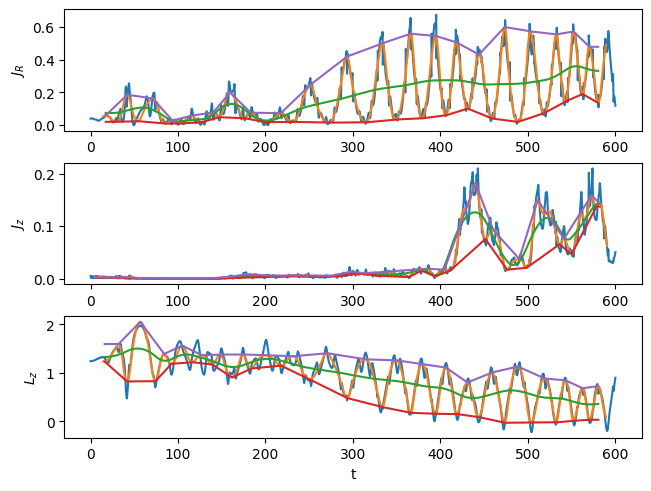

In [9]:
# Actions

fig, axes = plt.subplots(3, constrained_layout=True)

# JR
axes[0].plot(t, act[num,:,0])
axes[0].plot(t, JR)
axes[0].plot(t, JR_sec)
axes[0].plot(t, JR_max)
axes[0].plot(t, JR_min)

axes[0].set_ylabel('$J_R$')

# Jz
axes[1].plot(t, act[num,:,1])
axes[1].plot(t, Jz)
axes[1].plot(t, Jz_sec)
axes[1].plot(t, Jz_max)
axes[1].plot(t, Jz_min)

axes[1].set_ylabel('$J_z$')

# Lz
axes[2].plot(t, act[num,:,2])
axes[2].plot(t, Lz)
axes[2].plot(t, Lz_sec)
axes[2].plot(t, Lz_max)
axes[2].plot(t, Lz_min)
axes[2].set_ylabel('$L_z$')

axes[2].set_xlabel('t')

plt.show()

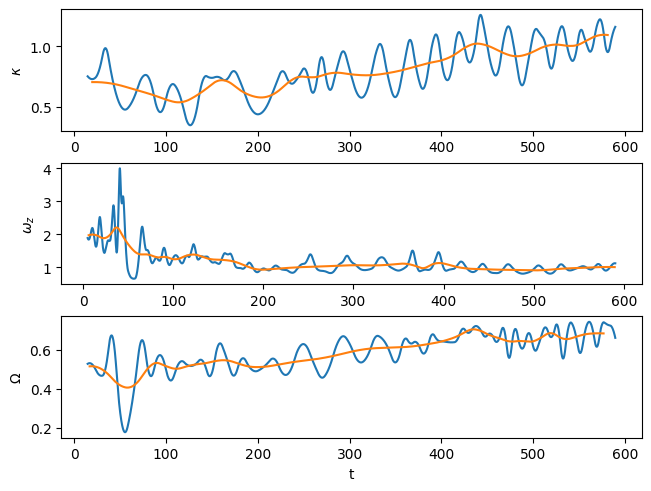

In [6]:
# Frequencies

fig, axes = plt.subplots(3, constrained_layout=True)

axes[0].plot(t, kappa)
axes[0].plot(t, kappa_sec)

axes[0].set_ylabel('$\\kappa$')


axes[1].plot(t, omegaz)
axes[1].plot(t, omegaz_sec)
axes[1].set_ylabel('$\\omega_z$')

axes[2].plot(t, Omega)
axes[2].plot(t, Omega_sec)
axes[2].set_ylabel('$\\Omega$')

axes[2].set_xlabel('t')

plt.show()

In [7]:
%%time
# Find actions, angles and frequencies of 
# the every orbit

OT = galport.OrbitTools(t=t, xv=xv, act=act)
data = OT.calculate_actions(secular=True)

CPU times: user 2.22 s, sys: 20.1 ms, total: 2.25 s
Wall time: 2.24 s


In [10]:
t = 400
n_t = int(t)*8

JR = data[:,n_t,0]
Jz = data[:,n_t,1]
Lz = data[:,n_t,2]

JR_sec = data[:,n_t,9]
Jz_sec = data[:,n_t,10]
Lz_sec = data[:,n_t,11]

kappa = data[:,n_t,6]
omegaz = data[:,n_t,7]
Omega = data[:,n_t,8]

kappa_sec = data[:,n_t,12]
omegaz_sec = data[:,n_t,13]
Omega_sec = data[:,n_t,14]

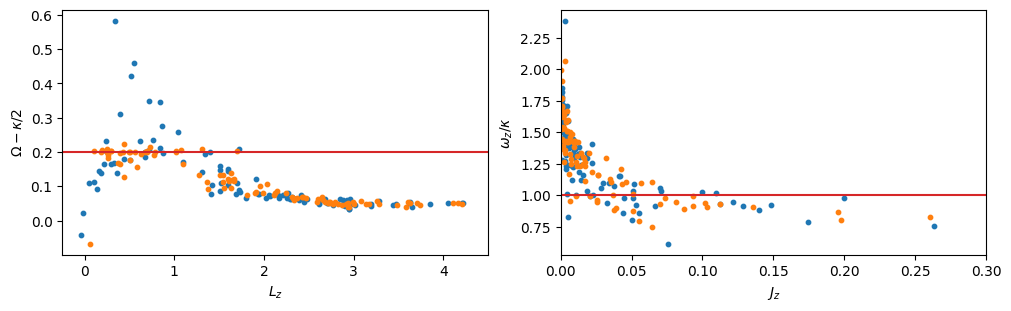

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10,3), constrained_layout=True)

axes[0].plot([-0.25, 4.5], [0.2,0.2], color='C3')
axes[0].scatter(Lz, Omega - kappa/2, s=10)
axes[0].scatter(Lz_sec, Omega_sec - kappa_sec/2, s=10)
axes[0].set_xlabel('$L_z$')
axes[0].set_ylabel('$\\Omega - \\kappa/2$')
axes[0].set_xlim(-0.25, 4.5)

axes[1].plot([0., 0.3], [1,1], color='C3')
axes[1].scatter(Jz, omegaz/kappa, s=10)
axes[1].scatter(Jz_sec, omegaz_sec/kappa_sec, s=10)
axes[1].set_xlabel('$J_z$')
axes[1].set_ylabel('$\\omega_z/\\kappa$')
axes[1].set_xlim(0, 0.3)

plt.show()